# try doc2vec

In [7]:
# model = Doc2Vec(contentcutlist, size=100, window=8, min_count=5, workers=4)
import pandas as pd
import numpy as np
import jieba
#改為中文繁體字典,預設是簡體，可到jieba的GitHub下載
jieba.set_dictionary(r'D:\WordLibrary\JiebaUse\jieba_dict.txt.big') 
from wordcloud import WordCloud
import random
import json
import gensim

In [8]:
with open(r"D:\Data\JsonData\TainanFood\final_tainan.json") as f:
    BigAnalyzeTable=json.load(f)


In [9]:
def StopWdFilter(user_input, stop_words):
    """Sanitize using intersection and list.remove()"""
    # Downsides:
    #   - Looping over list while removing from it?
    #     http://stackoverflow.com/questions/1207406/remove-items-from-a-list-while-iterating-in-python
    stop_words = set()
    with open('D:/WordLibrary/JiebaUse/stopwords.txt', 'r', encoding='utf-8') as sw:
        for line in sw:
            stop_words.add(line.strip('\n'))
    for sw in stop_words.intersection(user_input):
        while sw in user_input:
            user_input.remove(sw)

    return user_input

In [10]:
def CutWithFilter(CorpusList):
    result=[]
    for y in [jieba.cut(x) for x in CorpusList]:
        content = StopWdFilter([ _ for _ in y], stopwords)
        result.append(content)
    return result
#所以我選擇所過濾的是跟「文意」比較無關的符號
stopwords = ['〔','〕','／','（','）','「','」','『','』','\n','nan']
#像下面這種比較是傳統文字探勘在過濾字詞可能過濾的一些字詞
#stopwords = ['〔','〕','／','（','）','「','」','『','』','的','就是','這個','可以','一定'\
#             ,'一個','nan','沒有','我們','不是','不用','不是','自己','只要','大家','覺得','因為'\
#             ,'對於','起來','如果','每個','很多','一樣','時候','加上','使用','只是']

In [11]:
BigAnalyzeTable[4000]

{'address': '台南市北區海安路三段(台南花園夜市)',
 'average_consumption': '50',
 'business_hours': '17:00~01:30',
 'comment': [{'click': 2135,
   'content': '跟這家結緣是從五年前開始.......那時跟著愛人帶著饑腸轆轆,上班的疲憊,愛情的甜蜜來到這家店面,花園夜市大上海臭臭鍋......在那時看到了眾多的鍋品,及熱鬧的用餐氣氛,真的讓我兩垂涎三尺。以吃為個人存在主義的我硬是在將此列為花園夜市必吃的攤位之一,當然小弟我必吃的攤位也確實不少=="。建議初來的朋友能多多嘗試,盡而找到自己喜歡吃的鍋品。後來在去年該店家又新增了炸臭豆腐,彼鄰而立。好吃!!!光泡菜口味就會讓人覺得驚奇,有時是原味.辣味.梅子口味或百香果口味,光這變化還是我生平僅見,在花園夜市的銅板美食上,除了阿三哥蚵仔煎,我又新增了花園夜市大上海臭豆腐.......該店家也有媒體報導http://tw.travel.yahoo.com/topic/d7882545-3a17-3a76-8c42-ccc10b6e4446',
   'date': '2012-09-04 05:45:34',
   'message': None,
   'name': '愛吃鬼369659',
   'push': 4,
   'title': '花園夜市必吃',
   'url': 'http://www.ipeen.com.tw/comment/341437'}],
 'coordinate': {'lat': 23.0114877, 'lng': 120.2004125},
 'coupon': None,
 'image': None,
 'introduction': '大上海臭臭鍋是一個有平價、夜市美食、吃吃喝喝的其他鍋類，網友認為值得推薦的有：炸臭豆腐、韓式泡蔡鍋、泰式酸辣鍋',
 'name': '大上海臭臭鍋',
 'style': '其他鍋類',
 'tag': None,
 'tel': '0929187097'}

In [12]:
FoodArticle=[{'name':dien["name"],'content':"".join(pin['content'] for pin in dien['comment'])} for dien in BigAnalyzeTable]

In [13]:
FoodArticle[800]

{'content': '因為家很人很喜歡吃這間所以我們常常來這五更腸旺((必點辣辣的鴨血超級下飯！！糖醋黃魚((也是必點先把黃魚炸熟後再用糖醋的方式處裡...魚肉經過高文油炸瞬間緊實所以不會吃到鬆垮垮的魚肉渝苑川菜館算是老一輩的人在吃的館子也可以看見很多50年代的長輩帶著自己的家人來吃銀絲卷是我們家來渝苑必點的東西一來可以吃的比較飽，二是平常很少吃所以吃起來特別好吃假日來渝苑用餐千萬要先預約唷！！這天來用餐因為是特殊節日所以限定了用餐時間讓我們大家都吃的好趕可是這也不能怪店家啦...道地的川菜館幾乎都快消失不見了台南還存在幾間比較有名的川菜館，渝苑就是其中一間！！小菜吃完都還可以續唷宮保蟹腿~這道之前吃都還算不錯，可是今天吃起來蟹腳肉卻非常硬...失去了平常該有的表現到高雄興達港受訓，難得下南部的我，當然要找同學聊聊天，就在某個晚上，約在台南市聚餐，自然是吃吃喝喝聊聊，畢竟身在北部，要遇到這麼多南部的同學，也是不容易，只要在學校沒變仇人的，多年後相見都還算有得聊，這攤重點在哈啦，酒也沒喝很多，反倒比兩三個人小聚還輕鬆，店當然是同學熟識的，老闆也來敬酒哈啦，雖然招牌看起來不像老店，聽說這家店卻是頗有歷史MENU走中國風…上面的不知道是什麼字裡面倒是簡單，不過每道菜也都有名字的，只是那時顧著哈啦，也沒注意名字，所以，之後的菜名是我亂編的拼盤…冰冰涼涼鹹鹹的，口感不錯小菜有三碟，不過我都沒吃到醉雞…我點的，個人對醉雞也是有點小偏好，這裡的醉雞算是中上水準，雖然我不是很喜歡中藥的東西，不過醉機就是要有濃濃的紹興酒跟中藥味才過癮豬蹄皮…原來的菜名應該不像我取的這麼沒水準，這道菜就是滷豬腳的皮，弄成一盤菜，個人認為這道菜是這一餐最美味的，其中當然有我比較愛吃豬腳的緣故，不過，這個豬腳又香又嫩，鹹度也剛剛好，滷到了入口即化的地步蝦仁…滿下飯的一道菜腿庫…當然跟前一道菜是不同的口感，豬皮的部位雖然也是入口即化，卻多了點油膩的感覺，這是沒辦法避免的，不過，這道菜也是不錯吃的炒鱔魚…鱔魚看起來好瘦弱，這道感覺是整頓飯中比較弱的一道菜，自從吃過了旗津某路邊攤的炒鱔魚之後，其他的炒鱔魚都不怎麼樣了鴕鳥肉…有點做成鐵板燒的感覺，不過也有點太油，吃起來倒是還不錯，至少沒什麼怪腥味炒山蘇…看起來滿油的，不過山蘇本身新鮮度不錯，又嫩又脆蒸魚…魚新鮮，醬夠味，拌著青蔥吃就很美味，不過…我認不出來這

In [14]:
Food_df=pd.DataFrame(FoodArticle)

In [15]:
Food_df

,content,name
0,簡單、傳統的安平豆花，純白的豆花特別的挑逗我們的胃口。安平，兼具了台南傳統與現代的一個區域，...,同記安平豆花(安平總店)
1,----------------------------------------------...,深藍咖啡館
2,「阿堂鹹粥」～店家資訊～電話：(06)213-2572地址：台南市西門路一段728號營業時間...,阿堂鹹粥
3,台南》中西》排隊美食》手工Q彈．平民美食．富盛號碗粿來到台南永樂市場，好吃的美食是多到沒話說...,富盛號碗粿
4,最近感覺還真是吹起一股抹茶旋風啊!!自從xx嵐推出抹茶飲品後，蠻多店家也紛紛推出抹茶相關產品...,依蕾特布丁奶酪(安平門市)
5,天氣冷就是要吃個鍋呀！因為內容比較多，上一篇介紹無制式餐點，本篇介紹花雕鍋！有別於之前吃到的...,食下有約 想法廚房
6,飛饗義法典藏料理-旗艦總店（ＦＢ）週日上班日，下班就得用美食來好好犒賞自己。我和同事跑來『飛...,飛饗創意西式料理
7,台南美食特別多，而且都是傳統美食，歷久不衰，今天咱們拜訪的是開了一甲子的老牌水果店，莉莉水果...,莉莉水果店
8,從台南火車站前站出發走路大約10-15分鐘即可抵達當天只靠著家人小妹依稀的記憶還有親切的老闆...,連得堂餅舖
9,ㄡ～店家資訊～地址：700台南市中西區海安路一段66號開放時間：星期三~星期一AM：8:30...,矮仔成蝦仁飯


In [16]:
Food = Food_df.name+ " " + Food_df.content

In [17]:
Food

0       同記安平豆花(安平總店) 簡單、傳統的安平豆花，純白的豆花特別的挑逗我們的胃口。安平，兼具了...
1       深藍咖啡館 ----------------------------------------...
2       阿堂鹹粥 「阿堂鹹粥」～店家資訊～電話：(06)213-2572地址：台南市西門路一段728...
3       富盛號碗粿 台南》中西》排隊美食》手工Q彈．平民美食．富盛號碗粿來到台南永樂市場，好吃的美食...
4       依蕾特布丁奶酪(安平門市) 最近感覺還真是吹起一股抹茶旋風啊!!自從xx嵐推出抹茶飲品後，蠻...
5       食下有約 想法廚房 天氣冷就是要吃個鍋呀！因為內容比較多，上一篇介紹無制式餐點，本篇介紹花雕...
6       飛饗創意西式料理 飛饗義法典藏料理-旗艦總店（ＦＢ）週日上班日，下班就得用美食來好好犒賞自己...
7       莉莉水果店 台南美食特別多，而且都是傳統美食，歷久不衰，今天咱們拜訪的是開了一甲子的老牌水果...
8       連得堂餅舖 從台南火車站前站出發走路大約10-15分鐘即可抵達當天只靠著家人小妹依稀的記憶還...
9       矮仔成蝦仁飯 ㄡ～店家資訊～地址：700台南市中西區海安路一段66號開放時間：星期三~星期一...
10      泰成水果店 吃完霜淇淋再到對面的泰成水果店，看起來就是傳統的水果行，大都都在店內使用，人也是...
11      騷烤家(前鋒總店) 之前去住日木，本來要到騷烤家吃晚餐結果當天有其他組部落客，約了又約喬了又...
12      阿松割包 台南》中西》排隊美食》市場小吃．排隊美食．阿松割包介紹完金得春捲，絕對不能忘掉他對...
13      秉醇烘焙坊 說到手工餅乾，我一定第一個會想到秉醇，以前常常團購送人，好吃又體面而且價格都還算...
14      冰鄉 一位難求的台南人氣名店「冰鄉」快瞧瞧它的草莓牛乳冰，上面滿滿的草莓碩大又鮮豔欲滴，到台...
15      小銅鍋義式餐廳(德安誠品店) 位於德安百貨3F【LesPetitsPots小銅鍋】.提供多樣...
16      周氏蝦捲(總店) 逛完了夕張出遊所，繼續騎著車子往附近的安平老街出發~~~還要繼續吃吃喝喝和...
17      大菜市純薏仁

In [ ]:
Food_List = CutWithFilter(Food)

In [ ]:
Food_List[0]

# 6. 把gensim, Doc2Vec的套件匯入

In [ ]:
import gensim
Lsent = gensim.models.doc2vec.LabeledSentence
def labelizeNews(food, label_type):
    labelized = []
    #enumertate include index
    for i, v in enumerate(food):
        label = '%s_%s' %(label_type,i)
        labelized.append(Lsent(v, [label]))
    return labelized


# for i,v in enumerate()
# i為流水號，1  2  3
# v為每篇文章的，第1個字全部  第2個字全部  第3個字全部
# label_type為type標籤
# labelized = []
# for i,v in enumerate(Food_List):
#     label = '%s_%s' %('Food',i)
#     labelized.append(Lsent(v, [label]))

# 將第一篇的文字全部上Food_1的標籤
# 將第二篇的文字全部上Food_2的標籤
# 以此類推

# 7. 將每個的文章給一個標籤，方便分析完對應

In [ ]:
Train_Food = labelizeNews(Food_List,'Food')

In [ ]:
print(type(Train_Food))
print(type(Train_Food[1]))
Train_Food[0]#為上完標籤的gensimlabel＿

# 設定Doc2Vec參數 (使用seed or save model 來排除訓練的隨機成分，如果需要每次的向量結果相同 每一個Corpus產出400維的向量，預設使用3個核心做運算

In [ ]:
size = 400   
model_dm = gensim.models.Doc2Vec(min_count=1, window=10, size=size, sample=1e-3, negative=5, workers=3)
model_dbow = gensim.models.Doc2Vec(min_count=1, window=10, size=size, sample=1e-3, negative=5,dm=0, workers=3)

# 由有順序的句子建立model詞彙(讓model讀懂用的) 輸入的資料必須是((文章的有順序斷詞list)的list)

In [ ]:
model_dm.build_vocab(Train_Food)
model_dbow.build_vocab(Train_Food)

# 訓練十次，每次隨機交換文章順序 (由於是隨機, 要每次結果完全相同也可以固定訓練次序)

In [ ]:
for epoch in range(10):
    
    #總共幾篇文章(假設225) 對1~225做隨機排序的array
    perm = np.random.permutation(len(Train_Food))
    
    #將所有的文章隨機順序丟進去訓練 並告知model 共有225個example  5種時?
    model_dm.train([Train_Food[x] for x in perm],total_examples=model_dm.corpus_count,epochs=model_dm.iter)
    model_dbow.train([Train_Food[x] for x in perm],total_examples=model_dbow.corpus_count,epochs=model_dbow.iter)

In [ ]:
perm

# 可以把模型存起來，下次直接取回向量

In [ ]:
model_dm.save('D:/Data/doc2verData/model_dm2')
model_dbow.save('D:/Data/doc2verData/model_dbow2')

# 取出文章向量

In [ ]:
def getVecs(model, corpus, size):
    #取出每一個tag(Eat_1.Eat_2...Ser_1.Ser_2....)的向量(docvecs)，並將向量長度全都變成400size
    vecs = [model.docvecs[z.tags[0]].reshape((1, size)) for z in corpus]
    
    return np.concatenate(vecs)

In [ ]:
np.concatenate(model_dm.docvecs['Food_3'].reshape((1, 400)))

# 取出兩個模型 dm, dbow 取得其兩個模型的向量

In [ ]:
Train_Food_vecs_dm = getVecs(model_dm, Train_Food, size)
Train_Food_vecs_dbow = getVecs(model_dbow, Train_Food, size)
#將兩種模型的vec上下疊加
Food_train_vecs = np.hstack((Train_Food_vecs_dm, Train_Food_vecs_dbow))

# 載入scikit learn 套件 kmeans; 並將Doc2Vec的向量做分群 將所有食記嘗試分50群，並人工對群體做觀察

In [25]:
from sklearn.cluster import KMeans
Ngroup=50
#固定random state 隨機初始值 fixed the seed
Food_kmeans = KMeans(n_clusters=Ngroup, random_state=0).fit(Food_train_vecs)

In [26]:
#清一下記憶體
import gc
gc.collect()

0

# 將分群結果塞回DataFrame

In [27]:
# Food_df
# Food_List

#移除,的方法
Food_df['name']=Food_df['name'].apply(lambda y:y.replace(',',""))
Food_df['name']=Food_df['name'].apply(lambda y:y.replace('\n',"")) 

In [28]:
Food_df['Cluster'] = Food_kmeans.labels_

In [29]:
Food_df.to_excel('D:/Data/doc2verData/Food_'+str(Ngroup)+'gp2.xlsx')
Food_df.to_csv('D:/Data/doc2verData/Food_'+str(Ngroup)+'gp2.csv')

D:\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:830: UserWarning: Ignoring URL 'http://yainfoan.pixnet.net/blog/post/56409786DORY地址：台南市東區東安路296號營業時間：8:00-18:00（週一公休)電話：(06)235-0077Dory在小熊家附近，即使每天晚上散步都會經過但都沒注意到＝＝偶然的一個下午，小熊正愁著不知道該上哪去度過沒網路的時間，剛好看到DORY有提供無線上網，就帶著筆電來光顧。一問之下，才知道原來這間店已經在這兒七年了！！！！但時間差的關係，讓小熊忽略這間店。為什麼特別介紹這間店呢？第一次用餐時，身上帶的錢不多，就點了一個蛋糕飲料的組合。一般咖啡店的蛋糕送上來，可能就只是一個精美的盤子加上蛋糕，可是Dory送上來的除了蛋糕本身之外，旁邊還有鮮奶油以及新鮮水果做的盤飾。這塊蛋糕味道中規中矩，不會特別讓人驚艷，可是卻看得出來，Dory很重視食物的視覺美感，這點很對小熊胃口，一樣的食物換一個擺盤就可以讓小熊吃得很開心:)第一次的飲料是可可，苦中帶甜，第一口可以先襯著豐厚的奶泡入口，滿滿的奶香四溢，第二口將他攪勻再喝，整個甜入心坎裡。回家時，順便外帶了迷迭香雞腿佛卡夏三明治（外帶價：80元）迷迭香香氣十足，搭著爽口的生菜，真的非常好吃。（內用菜單）因為那陣子網路有問題，所以很快的，小熊又帶著電腦造訪。這次點的是奶酥丹麥吐司以及覆盆子愛爾蘭咖啡。丹麥吐司切成四片，上桌的時候還有特別擺盤，奶酥的香氣讓小熊一不小心就通通吃光了（原本還要留一點給熊貓吃）。覆盆子愛爾蘭咖啡，上面的奶油擠成了玫瑰的圖樣，淋上了覆盆子醬，看起來就是一朵盛開的紅玫瑰。這次是外帶迷迭香雞腿義大利麵（外帶價：120元）回家。整體風格是輕鬆中帶點雅緻，不會讓人感到壓力。這是外帶的迷迭香雞腿義大利麵，我們選擇的是白醬。白醬很濃郁，只是都沉在碗底下，回家最好是放在盤子上攤開，會比較容易沾到醬。迷迭香感覺像是不用錢的狂灑XD外帶的可可(外帶價：60元)，Dory的飲料，冰塊不會加太多，不會讓人有在喝冰塊的感覺XD雖然Dory是以早午餐為主的店家，不過目前小熊都還沒有吃過店裡的早午餐，倒是義大利麵外帶滿多次的XD小熊覺得外帶的東西是還滿划算的，而且離家近，也

In [30]:
gc.collect()

30

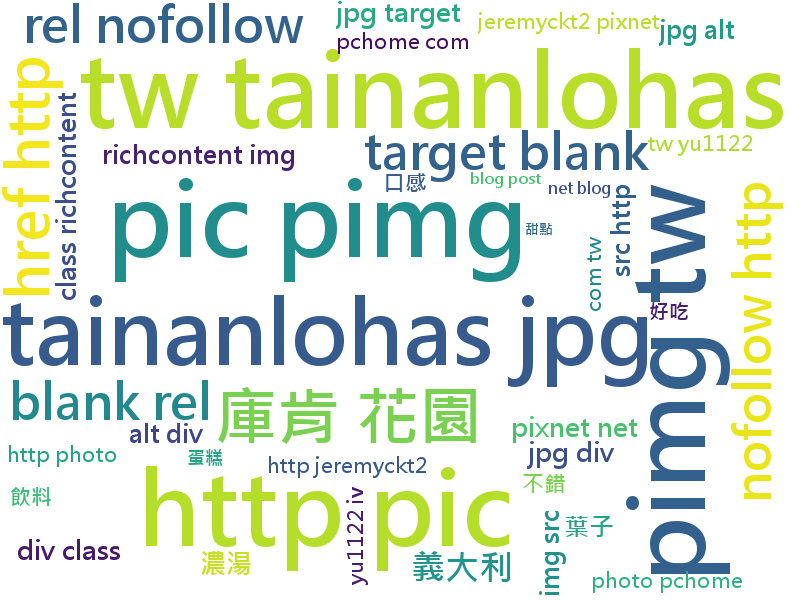

In [31]:
WC_Str=''
for i, x in enumerate(Food_kmeans.labels_):
    if x == 2:
        WC_Str += ' '.join(Food_List[i])

ww = WordCloud(max_font_size=100, relative_scaling=1,max_words=40,width=800, height=600,background_color='white',random_state=0,\
               stopwords=["臺南","菜色","味道","真的","店家","這道","感覺","比較","用餐","搭配",
         "料理","空間","一個","地方","台南市","台南","口味","店員",'一起','一段',
         '部分','餐點','地方','覺得','廁所','二樓',"看到","市場","地址","三段","一段",
         '兩段','中西區','海安','一盒','會館','座位','選擇','下午','提供','制式','使用',
         '北區','營業時間','電話','美食','一份','朋友','東西','一下','來到','一些','二段',
         '有點','應該','老闆','推薦','這家','一直','菜單','想法','平路','府連',
         '喜歡','東區','整個','時間','店內','國華','台北','聽說','升級','套餐',
         '餐廳','相當','店內','裡面','一點','一口','知道','已經','這是','客人'])\
               .generate(WC_Str)
ww.font_path = 'C:\Windows\Fonts\msjhbd' #微軟正黑體的路徑；字體可以自己設定，預設是英文的遇到中文會讀不出來
ww.to_image()
#ww.to_file('./pic/50gp_5.jpg') 可輸出圖檔

In [32]:
with open('D:/Data/doc2verData/Food_'+str(Ngroup)+'gp2.csv') as f:
    x=f.readlines()

# 發現有些群體過小 將它們合併為一個，並將超少評論或無評的文章群做標記

In [39]:
kfood=[dien.replace('\n',"").split(',')[2:] for dien in x[1:]]

[['涼涼冰冰的東西很受歡迎呢',
  '我們前一次來玩被滿滿的排隊人潮吸引進去',
  '這一次跟老公來玩當然也不會錯過啦',
  '畢竟安平也有不少必遊的景點',
  '順道來吃個冰很開心捏!是說',
  '相隔不遠之處也有一間名字一樣疑似是分店的',
  '生意就差很多',
  '這間店面比較大客人又比較多旁邊還有停車場',
  '怎麼樣最後都會選這間吃的~不過我們來到豆花店卻不想吃豆花',
  '兩個人都點了冰哪~哇哈哈哈粉圓冰~30元我很喜歡這裡的粉圓',
  '好Q好有嚼勁',
  '所以這次乾脆就點了一整碗的粉圓冰來吃',
  '不是我在說',
  '雖然這裡是豆花店',
  '但是冰品可是一點都不會遜色喔!你看看',
  '滿滿的一碗粉圓',
  '吃起來很過癮喔!牛奶雪花冰~55元可以選擇兩種配料',
  '老公挑了草莓粉圓~雪花冰的份量不少',
  '又可以搭配兩種配料',
  '感覺很划算呢~以上~來到安平想吃點涼的記得來這裡湊熱鬧喔!!同記安平豆花地址:台南市安南區安北路433號TEL:06-3915385相關文章2013-6-25台南~金得春捲2013-6-25台南~文章牛肉湯2013-6-26台南~集品蝦仁飯2013-6-26台南~阿堂鹹粥2011-7-16台南~度小月擔仔麵2011-7-16台南~旗哥牛肉湯台南~同記安平豆花2011-7-15台南安平~壹等品霸王豬腳2011-7-15台南安平~周氏蝦捲2013-6-25白河~阿和蓮花園2013-6-25台南~白河蓮花季(路邊的蓮花)2011-7-16台南~孔廟2005台南~走馬瀨農場赤崁樓安平古堡七股鹽山文章分類""台灣餐廳美食""索引導覽文章分類""台灣名勝景點""索引導覽靡靡與13姐的粉絲專頁也可以宣傳你的粉絲專頁★。★。★。★。★。★。★。★。★。★。★。★。★。★。★來到台南安平生日旅遊怎麼可以忘記來吃有名的『同記安平豆花』★。★。★。★。★。★。★。★。★。★。★。★。★。★。★↑非常醒目的招牌因為假日常常都會爆滿所以這家店的對面有一間機車停車場呢★。★。★。★。★。★。★。★。★。★。★。★。★。★。★↑珍珠豆花(30元)這陣子爆發了毒澱粉風波我和男友還是很勇敢的點了""珍珠豆花""((明明就是店家有合格證明))因為我本身很愛吃豆花吃過的豆花也不少呢但是我覺得安平豆花很古早味

In [34]:
groups={}
for dien in kfood:
    if dien[1] not in groups:
        groups[dien[1]]=set()
    groups[dien[1]].add(dien[0])

IndexError: list index out of range

In [ ]:
groups.keys()

In [ ]:
groups['無分類']=set()
willdel=set()
for group in groups:
    if len(groups[group])<40:
        groups['無分類'].update(groups[group])
        willdel.add(group)

In [ ]:
for group in willdel:
    del groups[group]

In [ ]:
g=0
newgroups={}
for i in groups:
    if i =="0":
        newgroups['無評']=list(groups[i])
    elif i =="無分類":
        newgroups['無分類']=list(groups[i])
    else:
        g+=1
        newgroups[str(g)]=list(groups[i])

In [ ]:
print(len(newgroups))
print([len(newgroups[i]) for i in newgroups])
#為了存成json 轉格式
# x=[dict({i:newgroups[i]}) for i in newgroups]

In [ ]:
import json
with open('D:/Data/doc2verData/Food_kmeans2.json','w') as f:
    json.dump(newgroups,f)